In [1]:
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mnist = datasets.load_breast_cancer()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 121, shuffle= True)

In [3]:
def cross_validation(classifier, features, labels):
  cv_scores = []
  for i in range(10):
    scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
  return cv_scores

dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels) 
print(dt_cv_scores)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels) 
print(rf_cv_scores)
svc_cv_scores = cross_validation(SVC(), features, labels) 
print(svc_cv_scores)
sgd_cv_scores = cross_validation(SGDClassifier(), features, labels) 
print(sgd_cv_scores)
logistic_cv_scores = cross_validation(LogisticRegression(solver='liblinear', max_iter=100), features, labels) 
print(logistic_cv_scores)

[0.9104323308270675, 0.9069862155388471, 0.9227443609022556, 0.9174185463659148, 0.9174498746867167, 0.9139724310776941, 0.9104010025062657, 0.9139724310776941, 0.9157581453634085, 0.9086779448621553]
[0.9561090225563911, 0.9648809523809524, 0.9614035087719298, 0.9631265664160402, 0.956077694235589, 0.9666666666666666, 0.9719298245614034, 0.9614035087719298, 0.9631578947368421, 0.96312656641604]
[0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882, 0.9138784461152882]
[0.8788533834586467, 0.8980263157894737, 0.8556077694235589, 0.875281954887218, 0.8206453634085212, 0.8521929824561404, 0.8682644110275689, 0.89984335839599, 0.8961779448621554, 0.8946115288220552]
[0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522, 0.9508145363408522]


<AxesSubplot:>

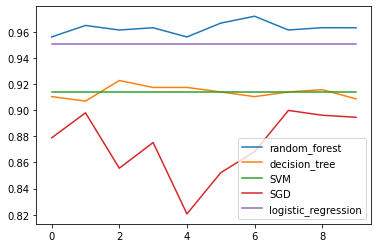

In [4]:
cv_list = [
           ['random_forest', rf_cv_scores],
           ['decision_tree', dt_cv_scores], 
           ['SVM', svc_cv_scores], 
           ['SGD', sgd_cv_scores], 
           ['logistic_regression', logistic_cv_scores], 
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [5]:
#의사결정 트리의 정확도
print(np.mean(dt_cv_scores))
#랜덤 포레스트의 정확도
print(np.mean(rf_cv_scores))
print(np.mean(svc_cv_scores))
print(np.mean(sgd_cv_scores))
print(np.mean(logistic_cv_scores))

0.913781328320802
0.9627882205513784
0.913878446115288
0.8739505012531328
0.9508145363408522


In [6]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
pred = clf.predict(X_test)
print("accuracy :", str(accuracy_score(y_test, pred)))

accuracy : 0.9912280701754386
